## Loading the Data

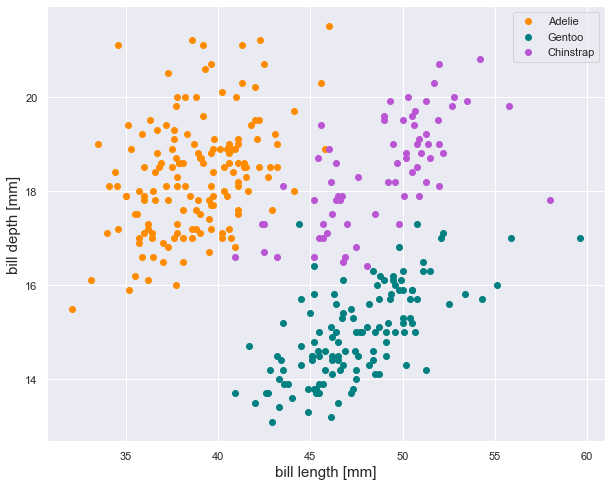

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set()

# Import the data
df = pd.read_csv("palmer_penguins.csv")

# Plot the data
penguins = ["Adelie", "Gentoo", "Chinstrap"]
colors = ["darkorange", "teal", "mediumorchid"]

fig, ax = plt.subplots(figsize = (10, 8))
for species, color in zip(penguins, colors):
    temp_df = df[df.species == species]
    ax.scatter(temp_df.bill_length_mm,
               temp_df.bill_depth_mm,
               c = color,
               label = species, 
               )
    
ax.set_xlabel("bill length [mm]", fontsize = 15)
ax.set_ylabel("bill depth [mm]", fontsize = 15)
ax.legend()
plt.show()

In [2]:
from sklearn.model_selection import train_test_split

df = df.dropna()
X = df[["bill_length_mm",
        "bill_depth_mm"]].to_numpy()

y = df["species"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [3]:
#Creating a function that calculates the Euclidean distance
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))
print(f"The distance between point 10 and 67 is {distance(X[10], X[67])}")

The distance between point 10 and 67 is 9.265527507918797


In [4]:
def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    # Create an empty list to store neighbors and distances
    neighbors = []
    
    for p, label in zip(training_features, training_labels):
        d = distance(point, p)
        temp_data = [p, label, d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

In [5]:
# Test the k_nearest_neighbors function
k_nearest_neighbors(X_test[-1], X_train, y_train, 5)

[[array([50.9, 17.9]), 'Chinstrap', 0.4999999999999993],
 [array([51.5, 18.7]), 'Chinstrap', 0.5385164807134515],
 [array([50.8, 18.5]), 'Chinstrap', 0.5830951894845304],
 [array([52. , 18.1]), 'Chinstrap', 0.70710678118655],
 [array([50.8, 19. ]), 'Chinstrap', 0.943398113205661]]

In [6]:
# Show the true label 
y_test[-1]

'Chinstrap'

In [7]:
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    else:
        return sum(x[1] for x in neighbors)/k

In [8]:
# Test our function 
KNN_Predict(X_test[-1], X_train, y_train, 5)

'Chinstrap'

In [9]:
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for point, label in zip(test_features, test_labels):
        error += label != KNN_Predict(point, 
                                      training_features, 
                                      training_labels, 
                                      k)
    return error/len(test_features)

In [10]:
# Test our function
classification_error(X_test, y_test, X_train, y_train, 7)

0.045454545454545456

In [11]:
possible_k = [k for k in range(3, 26, 2)]
errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train, k) for k in possible_k]

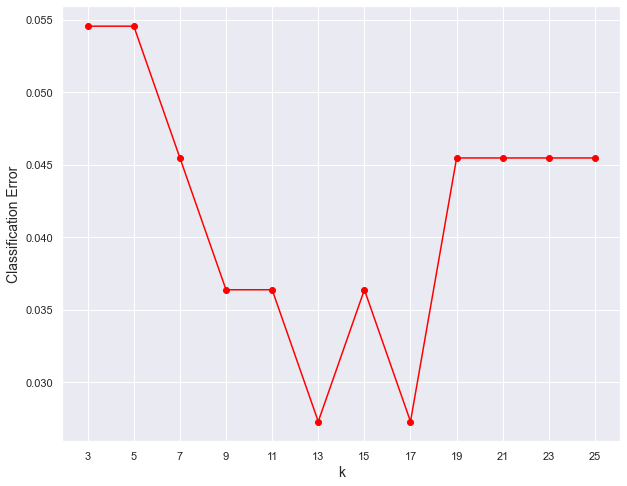

In [12]:
plt.figure(figsize = (10, 8))
plt.plot(possible_k, errors, color = 'red', marker = "o")
plt.xlabel('k', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.xticks(possible_k)
plt.show()

It seems that it is in our best interested to pick the 13-nearest neighbours.

In [13]:
classification_error(X_test, y_test, X_train, y_train, 13)

0.02727272727272727

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

options = ['Adelie','Chinstrap']
df_AC = df[df['species'].isin(options)]
X_new = df_AC[["bill_length_mm", "bill_depth_mm"]].to_numpy()


def make_labels(y):
    if y == "Adelie":
        return 0
    else:
        return 1
    
        
# Create target value array
y_new = df_AC["species"].map(make_labels).to_numpy()

# Create a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.33, random_state = 13)

# Instantiate a KNN classifier 
clf_new = KNeighborsClassifier(n_neighbors = 7)

In [15]:
clf_new.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [16]:
print(f"clf.predict(X_test) = {clf_new.predict(X_test)} \n")
y_pred = clf_new.predict(X_test)

print(f"y_pred == y_test = {y_pred == y_test} \n")

print(f"sum(y_pred == y_test)/len(y_test) = {sum(y_pred == y_test)/len(y_test)}")

clf.predict(X_test) = [0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0] 

y_pred == y_test = [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True] 

sum(y_pred == y_test)/len(y_test) = 1.0


In [17]:
# Calculate the accuracy
clf_new.score(X_test, y_test)

1.0

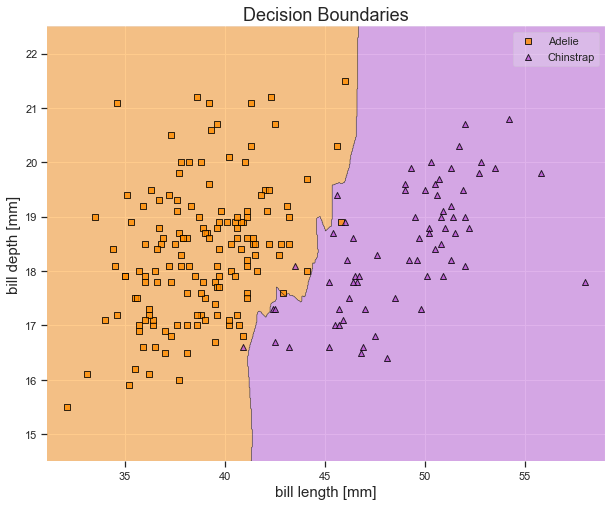

In [24]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
ax = plot_decision_regions(X_new, y_new, clf = clf_new,colors='darkorange,mediumorchid')
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill depth [mm]", fontsize = 15)
plt.title("Decision Boundaries", fontsize = 18)
handles, labels = ax.get_legend_handles_labels()           
ax.legend(handles, 
          ['Adelie', 'Chinstrap'], 
           framealpha=0.3, scatterpoints=1)   
        
plt.show()

cf_matrix = [[48  0]
 [ 0 23]] 



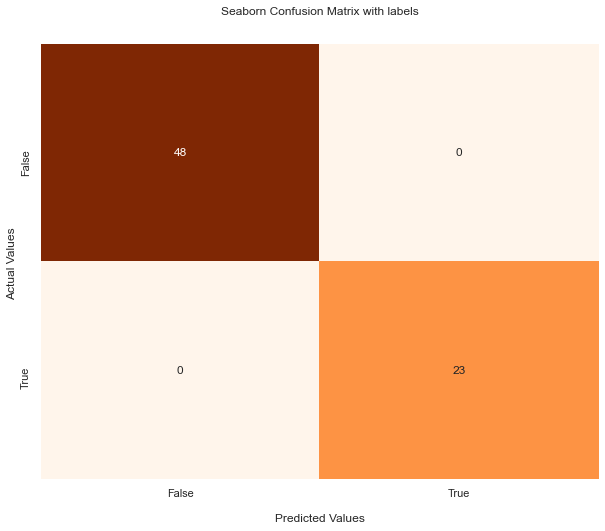

In [58]:
from sklearn.metrics import confusion_matrix
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


# Define the model
clf = KNeighborsClassifier(n_neighbors = 7)

# Fit the model
clf.fit(X_train,y_train)

# Make predictions on testing data
y_pred = clf.predict(X_test)

# Calculate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix 
print(f"cf_matrix = {cf_matrix} \n")

# View the confusion matrix using the seaborn package
plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap="Oranges", cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [20]:
from sklearn.metrics import classification_report

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        23

    accuracy                           1.00        71
   macro avg       1.00      1.00      1.00        71
weighted avg       1.00      1.00      1.00        71



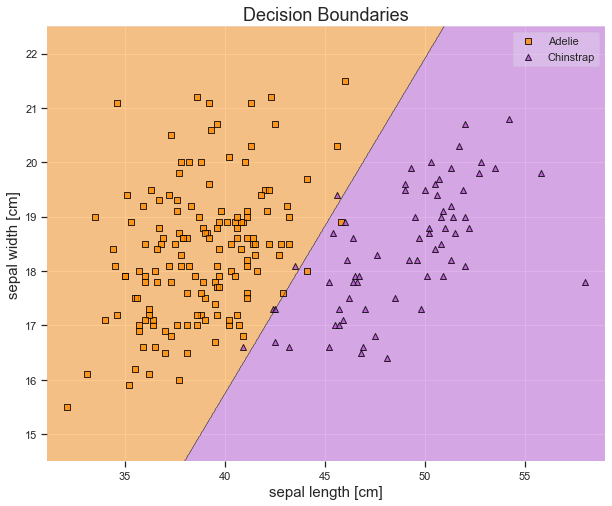

In [29]:
from sklearn.linear_model import LogisticRegression

clf2 = LogisticRegression(max_iter = 10_000)
clf2.fit(X_train, y_train)

log_y_pred = clf2.predict(X_test)

plt.figure(figsize = (10, 8))
ax = plot_decision_regions(X_new, y_new, clf = clf2,colors='darkorange,mediumorchid')
plt.xlabel("sepal length [cm]", fontsize = 15)
plt.ylabel("sepal width [cm]", fontsize = 15)
plt.title("Decision Boundaries", fontsize = 18)
handles, labels = ax.get_legend_handles_labels()           
ax.legend(handles, 
          ['Adelie', 'Chinstrap'], 
           framealpha=0.3, scatterpoints=1) 
plt.show()

cf_matrix = [[48  0]
 [ 1 22]] 



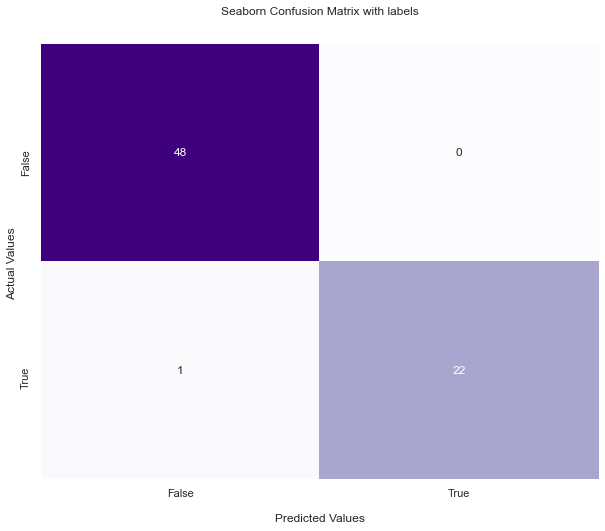

In [61]:
# Calculate the confusion matrix
cf_matrix = confusion_matrix(y_test, log_y_pred)

# Print the confusion matrix 
print(f"cf_matrix = {cf_matrix} \n")

# View the confusion matrix using the seaborn package
plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Purples', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [31]:
#Checking performance our model with classification report.
print(classification_report(y_test, log_y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.96      0.98        23

    accuracy                           0.99        71
   macro avg       0.99      0.98      0.98        71
weighted avg       0.99      0.99      0.99        71



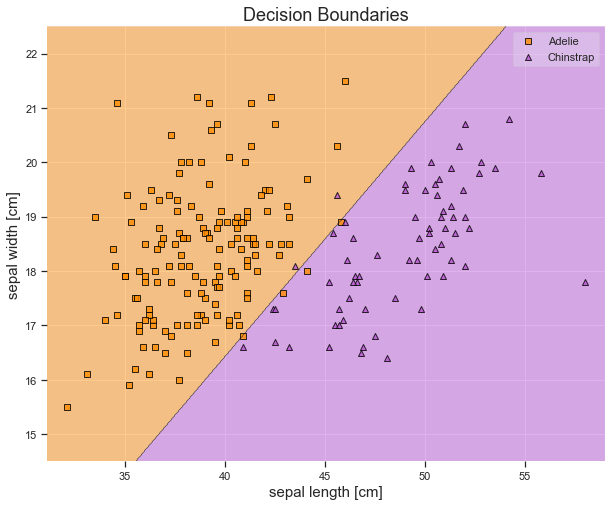

In [33]:
from sklearn.neural_network import MLPClassifier
clf3 = MLPClassifier(solver='lbfgs', alpha= 0.33,
                   hidden_layer_sizes=(120, 120), random_state=1, max_iter = 50_000)

clf3.fit(X_train, y_train)
net_y_pred = clf3.predict(X_test)

plt.figure(figsize = (10, 8))
ax = plot_decision_regions(X_new, y_new, clf = clf3,colors='darkorange,mediumorchid')
plt.xlabel("sepal length [cm]", fontsize = 15)
plt.ylabel("sepal width [cm]", fontsize = 15)
plt.title("Decision Boundaries", fontsize = 18)
handles, labels = ax.get_legend_handles_labels()           
ax.legend(handles, 
          ['Adelie', 'Chinstrap'], 
           framealpha=0.3, scatterpoints=1) 
plt.show()

cf_matrix = [[47  1]
 [ 1 22]] 



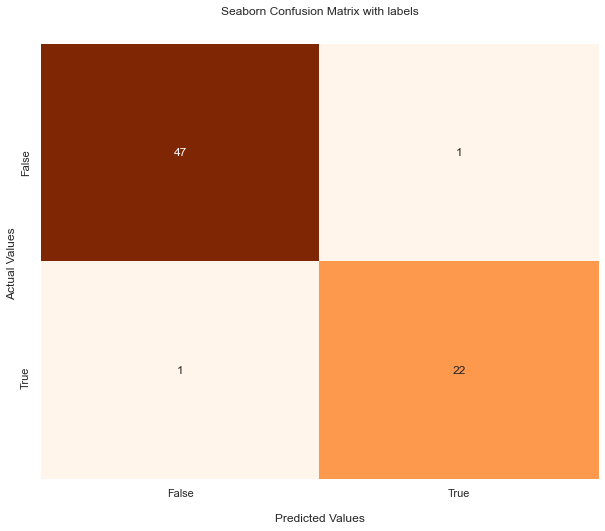

In [63]:
# Calculate the confusion matrix
cf_matrix = confusion_matrix(y_test, net_y_pred)

# Print the confusion matrix 
print(f"cf_matrix = {cf_matrix} \n")

# View the confusion matrix using the seaborn package
plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Oranges', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [35]:
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
print(classification_report(y_test, net_y_pred))

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        48
           1       0.96      0.96      0.96        23

    accuracy                           0.97        71
   macro avg       0.97      0.97      0.97        71
weighted avg       0.97      0.97      0.97        71

